In [1]:
import numpy as np
def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k
        x = x_new
    return x, max_iterations

def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k
        x = x_new
    return x, max_iterations

In [10]:
import time

A = ([[3, -0.1, -0.2], [0.1, 7, -0.3], [0.3, -0.2, 10]])
b = ([7.85, -19.3, 71.4])
x0 = np.zeros_like(b, dtype=float) 
max_iterations = 100

tol = 1e-3
jsolution, jiterations = jacobi(A, b, x0, tol, max_iterations)
gsolution, giterations = gauss_seidel(A, b, x0, tol, max_iterations)
print('Jacobi iterations:', jiterations)
print('Gauss-Seidel iterations:', giterations)
print('j', jsolution)
print('g', gsolution)

tol = 1e-6
jsolution, jiterations = jacobi(A, b, x0, tol, max_iterations)
gsolution, giterations = gauss_seidel(A, b, x0, tol, max_iterations)
print('Jacobi iterations:', jiterations)
print('Gauss-Seidel iterations:', giterations)
print('j', jsolution)
print('g', gsolution)

tol = 1e-9
jsolution, jiterations = jacobi(A, b, x0, tol, max_iterations)
gsolution, giterations = gauss_seidel(A, b, x0, tol, max_iterations)
print('Jacobi iterations:', jiterations)
print('Gauss-Seidel iterations:', giterations)
print('j', jsolution)
print('g', gsolution)

Jacobi iterations: 3
Gauss-Seidel iterations: 3
j [ 3.0000225  -2.50000266  6.99998104]
g [ 3.00000035 -2.50000004  6.99999999]
Jacobi iterations: 6
Gauss-Seidel iterations: 4
j [ 3.  -2.5  7. ]
g [ 3.  -2.5  7. ]
Jacobi iterations: 8
Gauss-Seidel iterations: 6
j [ 3.  -2.5  7. ]
g [ 3.  -2.5  7. ]


Jacobi method needs more iterations than Gauss-Seidel to converge at various tolerances.

Text(0, 0.5, 'gauss-seidel errors')

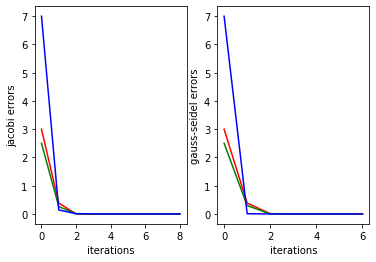

In [31]:
import matplotlib.pyplot as plt
A = ([[3, -0.1, -0.2], [0.1, 7, -0.3], [0.3, -0.2, 10]])
b = ([7.85, -19.3, 71.4])
x0 = np.zeros_like(b, dtype=float) 
max_iterations = 100
tol = 1e-9
jreal, jiterations = jacobi(A, b, x0, tol, max_iterations)
greal, giterations = gauss_seidel(A, b, x0, tol, max_iterations)

jmax = jiterations
gmax = giterations
j_errors = np.zeros((jiterations+1, len(A[1])))
j_errors[0] = np.abs(x0-jreal)
g_errors = np.zeros((giterations+1, len(A[1])))
g_errors[0] = np.abs(x0-greal)
for i in range (1, jmax+1):
    jsolution, jiterations = jacobi(A, b, x0, tol, i)
    j_errors[i] = np.abs(jsolution-jreal)
for i in range (1, gmax+1):
    gsolution, giterations = gauss_seidel(A, b, x0, tol, i)
    g_errors[i] = np.abs(gsolution-greal)
j_it = np.linspace(0, jiterations, jiterations + 1)
g_it = np.linspace(0, giterations, giterations + 1)

plt.subplot(1, 2, 1)
plt.plot(j_it, j_errors[:, 0], 'r-')
plt.plot(j_it, j_errors[:, 1], 'g-')
plt.plot(j_it, j_errors[:, 2], 'b-')
plt.xlabel('iterations')
plt.ylabel('jacobi errors')

plt.subplot(1, 2, 2)
plt.plot(g_it, g_errors[:, 0], 'r-')
plt.plot(g_it, g_errors[:, 1], 'g-')
plt.plot(g_it, g_errors[:, 2], 'b-')
plt.xlabel('iterations')
plt.ylabel('gauss-seidel errors')

A trend emerges for both methods that as the tolerance becomes smaller (more precision needed), more iterations are required to converge.